In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns


In [5]:
# Cargar el archivo parquet
df = pd.read_parquet("C:/Users/javier.sdiaz/Desktop/BootCamp/DS102024/3-MachineLearning/EDA_2/train.parquet")

df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,599,Dell,Inspiron 3179,2 in 1 Convertible,11.6,Touchscreen 1366x768,Intel Core M 7Y30 1.0GHz,4GB,128GB SSD,Intel HD Graphics 615,Windows 10,1.39kg,603.0
1,92,Asus,FX550IK-DM018T (FX-9830P/8GB/1TB/Radeon,Gaming,15.6,Full HD 1920x1080,AMD FX 9830P 3GHz,8GB,1TB HDD,AMD Radeon RX 560,Windows 10,2.45kg,699.0
2,744,HP,ZBook 15,Workstation,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD,Nvidia Quadro M2200,Windows 10,2.6kg,2419.0
3,729,HP,Pavilion X360,2 in 1 Convertible,13.3,IPS Panel Touchscreen 1366x768,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.58kg,836.6
4,957,Toshiba,Tecra A50-C-1ZV,Notebook,15.6,1366x768,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,2.2kg,1119.0


## 1. INSPECCIÓN INICIAL

In [7]:
# Resumen del DataFrame

print("Dimensiones del DataFrame:", df.shape)
print("\nInformación del DataFrame:")
print(df.info())

Dimensiones del DataFrame: (912, 13)

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         912 non-null    int64  
 1   Company           912 non-null    object 
 2   Product           912 non-null    object 
 3   TypeName          912 non-null    object 
 4   Inches            912 non-null    object 
 5   ScreenResolution  912 non-null    object 
 6   Cpu               912 non-null    object 
 7   Ram               912 non-null    object 
 8   Memory            912 non-null    object 
 9   Gpu               912 non-null    object 
 10  OpSys             912 non-null    object 
 11  Weight            912 non-null    object 
 12  Price_euros       912 non-null    float64
dtypes: float64(1), int64(1), object(11)
memory usage: 92.8+ KB
None


In [8]:
# Resumen estadístico
print("\nEstadísticas descriptivas:")
print(df.describe(include='all'))


Estadísticas descriptivas:
          laptop_ID Company Product  TypeName Inches   ScreenResolution  \
count    912.000000     912     912       912    912                912   
unique          NaN      19     484         6     18                 38   
top             NaN    Dell  XPS 13  Notebook   15.6  Full HD 1920x1080   
freq            NaN     214      21       498    461                357   
mean     663.118421     NaN     NaN       NaN    NaN                NaN   
std      380.713558     NaN     NaN       NaN    NaN                NaN   
min        1.000000     NaN     NaN       NaN    NaN                NaN   
25%      339.750000     NaN     NaN       NaN    NaN                NaN   
50%      666.500000     NaN     NaN       NaN    NaN                NaN   
75%      985.250000     NaN     NaN       NaN    NaN                NaN   
max     1320.000000     NaN     NaN       NaN    NaN                NaN   

                               Cpu  Ram     Memory                    G

## 2. LIMPIEZA DE DATOS

- Eliminar o imputar valores faltantes.
- Manejar valores duplicados (si los hay).
- Verificar la consistencia de los datos.

In [10]:
# Valores faltantes por columna
missing_values = df.isnull().sum()
print("Valores faltantes por columna:")
print(missing_values)

Valores faltantes por columna:
laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64


In [11]:
# Número de filas duplicadas
duplicates = df.duplicated().sum()
print(f"\nNúmero de filas duplicadas: {duplicates}")


Número de filas duplicadas: 0


In [12]:
# Valores únicos por columna (especialmente para columnas categóricas)
print("\nValores únicos por columna:")
for column in df.columns:
    if not pd.api.types.is_numeric_dtype(df[column]):
        print(f"{column}: {df[column].unique()[:10]}")


Valores únicos por columna:
Company: ['Dell' 'Asus' 'HP' 'Toshiba' 'Lenovo' 'Google' 'LG' 'MSI' 'Acer'
 'Mediacom']
Product: ['Inspiron 3179' 'FX550IK-DM018T (FX-9830P/8GB/1TB/Radeon' 'ZBook 15'
 'Pavilion X360' 'Tecra A50-C-1ZV' 'Vostro 5468' '250 G6' 'Latitude 3580'
 'IdeaPad 310-15IKB' 'IdeaPad Y700-15ACZ']
TypeName: ['2 in 1 Convertible' 'Gaming' 'Workstation' 'Notebook' 'Ultrabook'
 'Netbook']
Inches: ['11.6' '15.6' '13.3' '14.0' '12.3' '17.3' '12.5' '13.9' '15.4' '13.5']
ScreenResolution: ['Touchscreen 1366x768' 'Full HD 1920x1080'
 'IPS Panel Touchscreen 1366x768' '1366x768' 'IPS Panel Full HD 1920x1080'
 'Touchscreen 2400x1600' 'IPS Panel Full HD / Touchscreen 1920x1080'
 'Full HD / Touchscreen 1920x1080' 'IPS Panel 1366x768'
 '4K Ultra HD / Touchscreen 3840x2160']
Cpu: ['Intel Core M 7Y30 1.0GHz' 'AMD FX 9830P 3GHz'
 'Intel Core i7 7700HQ 2.8GHz' 'Intel Core i5 7200U 2.5GHz'
 'Intel Core i5 6200U 2.3GHz' 'Intel Core i3 6006U 2GHz'
 'AMD FX 8800P 2.1GHz' 'Intel Core i7 7500U 2

## 3. ANÁLISIS UNIVARIANTE

- Histogramas y boxplots para variables numéricas.
- Conteos y gráficas de barras para variables categóricas.

In [17]:
df.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

In [20]:

numerical_columns = ['Inches', 'Weight', 'Price_euros']  
categorical_columns = ['Company', 'TypeName', 'Ram','OpSys']  


# Configurar tamaño de las gráficas
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)




Análisis de variables numéricas:

Columna: Inches
count      912
unique      18
top       15.6
freq       461
Name: Inches, dtype: object


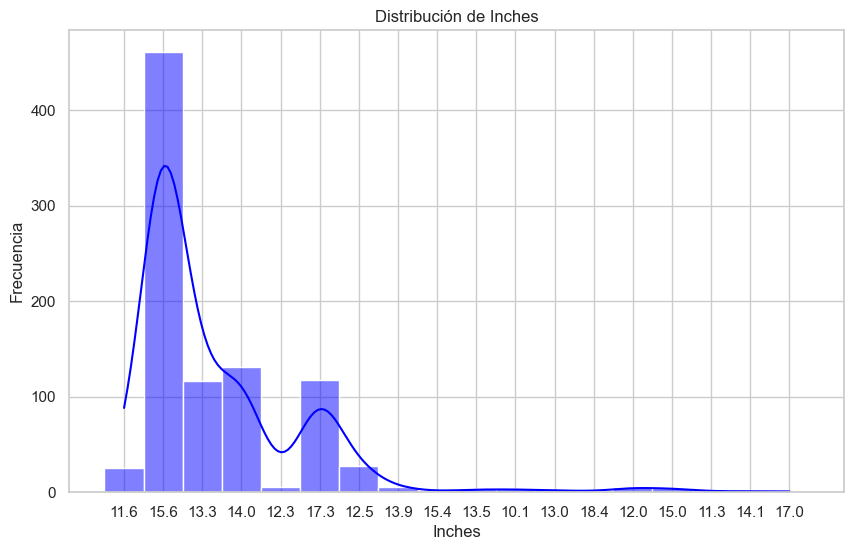


Columna: Weight
count       912
unique      160
top       2.2kg
freq         84
Name: Weight, dtype: object


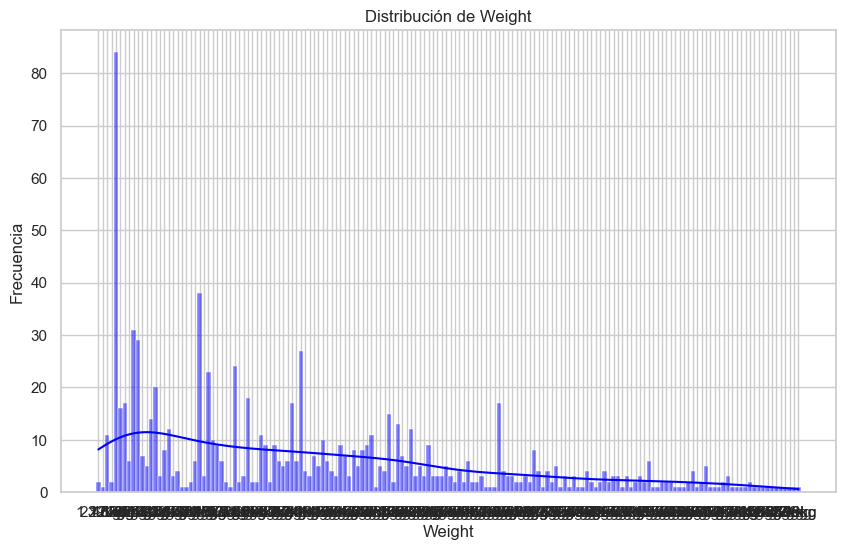


Columna: Price_euros
count     912.000000
mean     1111.262533
std       682.109694
min       174.000000
25%       598.742500
50%       977.000000
75%      1472.650000
max      5499.000000
Name: Price_euros, dtype: float64


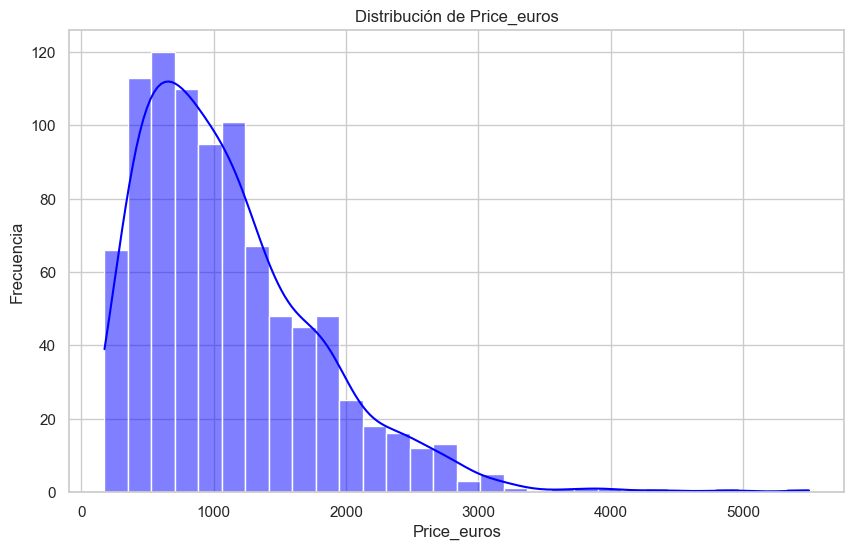

In [21]:
print("\nAnálisis de variables numéricas:")
for column in numerical_columns:
    print(f"\nColumna: {column}")
    print(df[column].describe())  # Estadísticas descriptivas
    sns.histplot(df[column], kde=True, bins=30, color='blue')
    plt.title(f"Distribución de {column}")
    plt.xlabel(column)
    plt.ylabel("Frecuencia")
    plt.show()


Análisis de variables categóricas:

Columna: Company
Company
Dell         214
Lenovo       206
HP           184
Asus         105
Acer          72
MSI           44
Toshiba       35
Apple         13
Samsung        9
Razer          5
Mediacom       5
Google         3
LG             3
Microsoft      3
Fujitsu        3
Xiaomi         2
Huawei         2
Chuwi          2
Vero           2
Name: count, dtype: int64


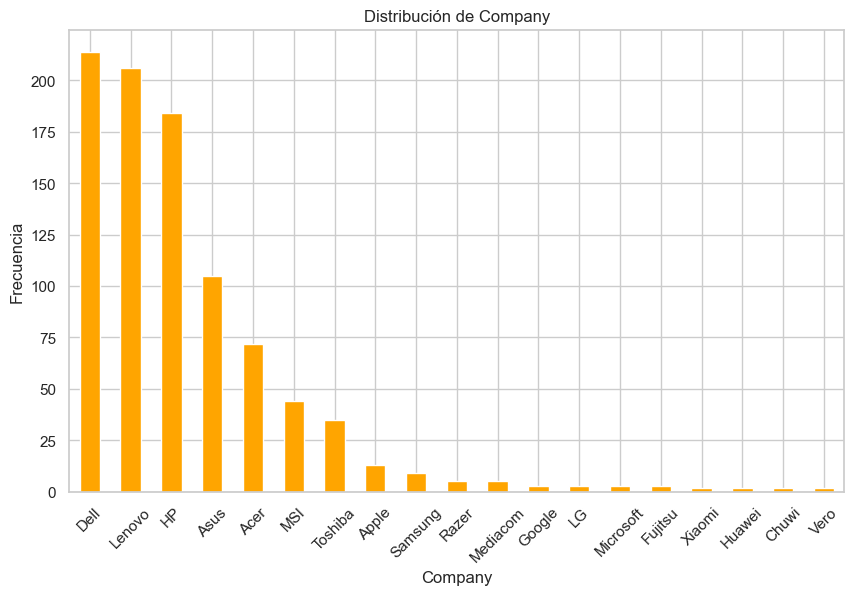


Columna: TypeName
TypeName
Notebook              498
Gaming                149
Ultrabook             132
2 in 1 Convertible     87
Workstation            24
Netbook                22
Name: count, dtype: int64


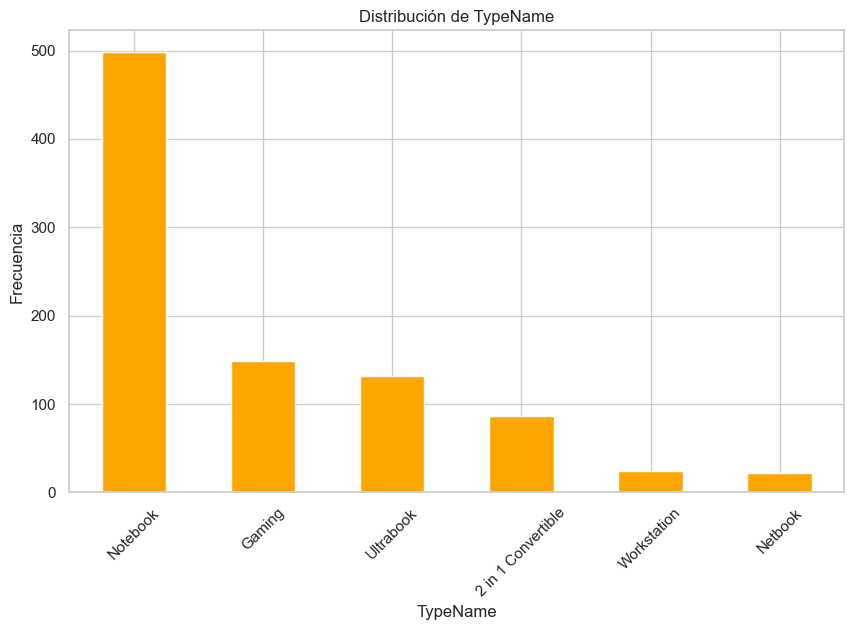


Columna: Ram
Ram
8GB     436
4GB     262
16GB    138
6GB      30
12GB     18
2GB      14
32GB     12
24GB      1
64GB      1
Name: count, dtype: int64


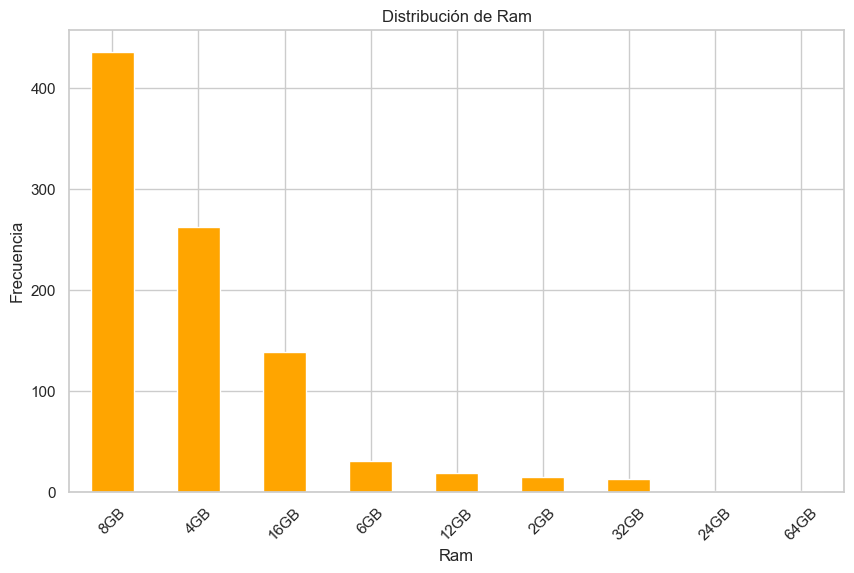


Columna: OpSys
OpSys
Windows 10      760
Linux            43
No OS            39
Windows 7        31
Chrome OS        20
Mac OS X          7
macOS             6
Windows 10 S      5
Android           1
Name: count, dtype: int64


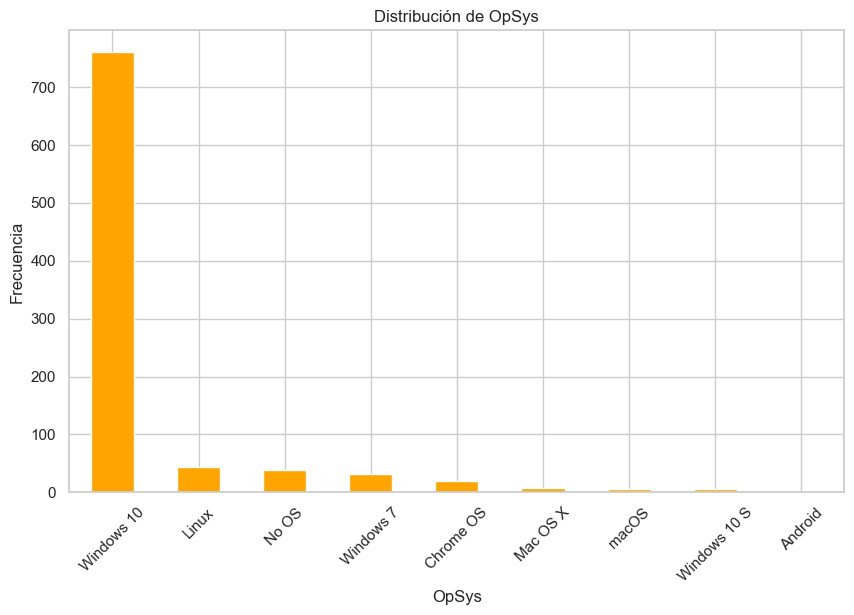

In [22]:
# Análisis de variables categóricas
print("\nAnálisis de variables categóricas:")
for column in categorical_columns:
    print(f"\nColumna: {column}")
    print(df[column].value_counts())  # Conteo de valores
    df[column].value_counts().plot(kind='bar', color='orange')
    plt.title(f"Distribución de {column}")
    plt.xlabel(column)
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=45)
    plt.show()

## 4. FEATURE ENGINEERING

- Crear nuevas columnas.
- Codificar variables categóricas.
- Normalizar variables numéricas (si corresponde).